## Non-fluctuating interaction between groundwater and surface water

In [11]:
# Load modules and define convenient plotting function
import matplotlib.pyplot as plt
import numpy as np
import scipy.special as scp  # for special functions

def aplot(x, y, ijk=111, xlabel='x', ylabel='y', title='function', **kwargs):
    """Plot x,y and return axes of a freshly prepared plot or subplot
    """
    ax = plt.figure().add_subplot(ijk)
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)
    ax.grid()
    ax.plot(x, y, **kwargs)
    return ax

### Basic analytical solution: a sudden change at $x=0$

Consider the one-dimensional half-space from $x=0$ to $x=\infty$ that has an aquifer of constant transmissivity $kD$ and storage coefficient $S$, without recharge. The governing partial differential equation that describes the dynamical physics of the groundwater flow then is

$$ kD \frac {\partial^2 \phi} {\partial x^2} = S \frac {\partial \phi} {\partial t}$$

One well-known analytical solution for the head is for initial head $\phi=0$ where the head at $x=0$ is suddenly changed by the fixed amount a. The situation is sketched in the figure:

![sudden change at x=0](./pictures/StripWaterLevelOneSideBya.png)

The anlaytical solution for this situation is:

$$ \phi = a \,\mathrm{erfc}(u),\,\,\,\,\, u = \sqrt{\frac {x^2 S} { 4 kD t}} $$

Where $\mathrm{erfc}(\cdots)$ is the so-called `complementary error function`.

This function is present in the module `scipy.special`, and we'll use it right away.

The function $\mathrm{erfc}(z)$ is shown here for $z=0 \cdots 3$

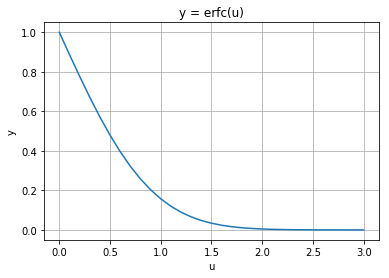

In [5]:
z = np.linspace(0, 3, 31)
aplot(z, scp.erfc(z), xlabel='u', title='y = erfc(u)')
plt.show()

This entire solution is contained in this curve because the solutions depends only on the  variable $u = \sqrt { x^2 S / (4 kD t) }$, in which constituting parameters are bound in a fixed relation with respect to each other.

Of course, if we take $x$ as our horizontal axis, we will have different graphs at different times. For instance:

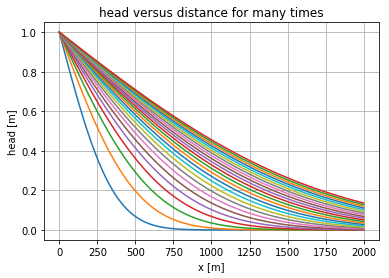

In [13]:
kD   = 900 # m2/d
S    = 0.1 # [m]
a    = 1.0 # m
x    = np.linspace(0, 2000, 100)
time = np.linspace(0, 100, 25)
uu   = x**2 * S /(4 * kD)
# plot the first curve (t[1])
ax   = aplot(x, a * scp.erfc(np.sqrt(uu/time[1])), xlabel='x [m]', ylabel='head [m]',
                           title='head versus distance for many times')
# plot the other curves t[2:]
for t in time[2:]:
    ax.plot(x, a * scp.erfc(np.sqrt(uu/t)))
plt.show()

What would be the solution if the aquifer would extend over $-infty<x<\infty$ where there would be a glasplate at $x=0$ and the initial heads would be $h=a$ for $x<0$ and $h=0$ for $x>0$, after the plate is suddenly withdrawn at $t=0$?

It is not difficult to see that then the head at $x=0$ would be fixed at $h=a/2$ forever while the head at $x<0$ would gradually decline to $a/2$ and the head at $x>0$ would gradually rise to $h=a/2$. Hence the same solution but with $h=0.5a$ at $x=0$ instead of $h=a$.

Lets plot it

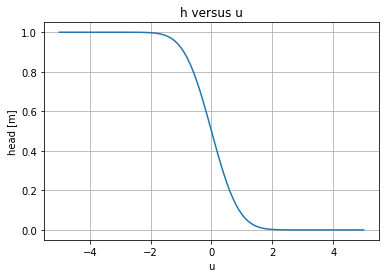

In [15]:
a = 1.0
u = np.linspace(-5., 5., 101)
aplot(u, 0.5 * a * scp.erfc(u), xlabel='u', ylabel='head [m]', title='h versus u')
plt.show()

and as a function of x for many times as before

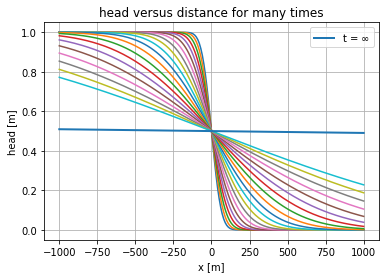

In [16]:
x    = np.linspace(-1000, 1000, 201)
time = np.logspace(-1, 2, 21)
uu   = x * np.sqrt( S /(4 * kD))
# plot the first curve (t[1])
ax   = aplot(x, a/2. * scp.erfc(uu/np.sqrt(time[1])), xlabel='x [m]', ylabel='head [m]',
                           title='head versus distance for many times')
# plot the other curves t[2:]
for t in time[2:]:
    ax.plot(x, a/2. * scp.erfc(uu / np.sqrt(t)))
ax.plot(x, a/2. * scp.erfc(uu/ np.sqrt(time[-1]*1000)), lw=2, label='t = $\infty$')
ax.legend()
plt.show()

It is clear that the head at infinity is horizontal, halfway between the two initial heads. I just filled in a very large time to compute it.

Let's continue for now with the latter solution as it is a bit more general than the first and provides more insight.

$$ h = \frac a 2 \mathrm{erfc}(u), \,\,\,\, u = x \sqrt{\frac S {4 kD t} } $$


Mathematically erfc it is defined as

$$ \mathrm{erfc}(u) = \frac 2 {\sqrt{\pi}} \intop_u^\infty e^{{-\zeta}^2}  \, d \zeta $$

Sot hat we have the following derivative:

$$ \frac {d \mathrm{erfc} (u)} {du}  = - \frac 2 {\sqrt{\pi}} \, e^{-u^2} $$



Using this derivative, we can compute the discharge [L2/T] by Darcy's law:

$$ Q = -a \, kD \frac {\partial h} {\partial x} = -a \, kD \frac 2 {\sqrt{\pi}} e^{-u^2} \sqrt{\frac S {4 kD t} }  $$

$$ Q =  a \,\sqrt{ \frac {SkD} {\pi t} } e^{-u^2} $$ 

### Relation between the erfc solution and the normal probability density function

The figure below shows the derivative of the $\mathrm{erfc}(u)$ function, where we numerically calculated it for  $-3<u<+3$.

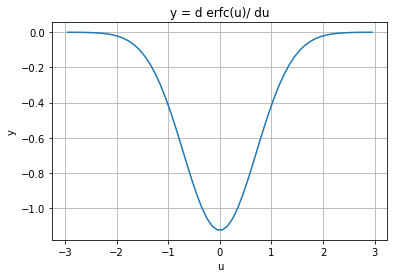

In [17]:
u = np.linspace(-3., 3., 61)
aplot(0.5*(u[:-1] + u[1:]), np.diff(scp.erfc(u))/np.diff(u), xlabel='u', title='y = d erfc(u)/ du')

Of course in our context this curve is only valid for $u>0$. But showing them for a wider range of $u$ makes evident its similarity with the bell shaped normal probability density function, that quantifies the probability of the outcome of an event $x$ to be between $a$ and $b$ is completely defined by its mean $\mu$ and its standard eviation $\sigma$:

$$ p = \frac 1 {\sigma \sqrt{2 \pi}} e^{-\frac 1 2 \left( \frac {x-\mu} { \sigma} \right)^2} $$

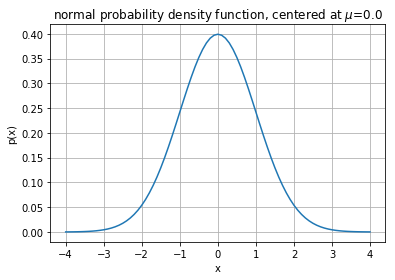

In [19]:
x = np.linspace(-4., 4., 81); mu = 0.; sigma = 1.0

aplot(x, 1 / np.sqrt(2 * np.pi) * np.exp(-0.5 * ((x - mu)/sigma)**2), xlabel='x', ylabel='p(x)',
      title='normal probability density function, centered at $\mu$={}'.format(mu))
plt.show()

The width of the bell of these two functions is completely defined by the argument of the exponent. Noting that $u=\sqrt{ \frac {x^2 S} {4 kD t} }$ and setting these two arguments equal to each other yields

$$ u^2 = \frac {x^2 S} {4 kD t} = \frac {x^2} {2 \sigma^2} $$

yields

$$ \sigma = \sqrt{ \frac {2 kD t} S } $$


So the standard deviation of the normal probability density function is equivalent to $\sqrt{ \frac {2 kD t} S } $.



The probabililty of event $a<x<b$ is

$$ P(a<x<b) = \frac 1 {\sigma \sqrt{2 \pi} } \intop_a^b  e^{- \left(\frac {x - \mu} {\sigma \sqrt 2} \right)^2} dx $$

Pushing $a$ to $-\infty$ yields the cumulative probability density function, which quantifies the probability of $x<b$

$$ P(x<b) =  \frac 1 {\sigma \sqrt{ 2 \pi}} \intop_{-\infty}^b  e^{- \frac 1 2 \left(\frac {x - \mu} \sigma \right)^2} dx = \mathrm{erfc} $$

The probability of $x>a$ is obviously obtained by pushing $b$ to $+\infty$

$$ P(x>a) =  \frac 1 {\sigma \sqrt{2 \pi}} \intop_a^{\infty}  e^{- \frac 1 2 \left(\frac {x - \mu} \sigma \right)^2} dx $$

The $\mathrm{erfc}$ function obtained in the groundwater solution above closely resembles this last cumulative probability density function:

$$ \mathrm{erfc}(u) = \frac 2 {\sqrt{\pi}} \intop_u^\infty e^{{-\zeta}^2}  \, d \zeta $$

The solution with $\frac 1 2 \mathrm{erfc}(\cdots)$ looks like a complete cumulative probability density function, so let's try to transfer the cumulative probability density function into the solution with the half $\frac 1 2 \mathrm{erfc}(\cdots)$ function:

Taking the center of the distribution $mu=0$ for convenience,

$$ Pr = \frac 1 {\sigma \sqrt{2 \pi}} \intop_a^\infty e^{-\left( \frac x {\sigma \sqrt 2}\right)^2} dx $$

$$ Pr = \frac {\sigma \sqrt 2} {\sigma \sqrt{2 \pi}} \intop_{x=a}^\infty e^{-\left( \frac x {\sigma \sqrt 2}\right)^2} d \frac x {\sigma \sqrt 2} $$

$$ Pr = \frac 1 {\sqrt{\pi}} \intop_{\zeta=\frac a {\sigma \sqrt2} = u}^\infty e^{- \zeta^2 } d \zeta $$

$$ Pr = \frac 1 2 \mathrm{erfc} (u) $$

Hence, our groundwater flow solution is exactly the same as the cumulative probability density function that quantifies the probability that event $\zeta>u$

The error function is the opposite of the complementary error function, it is the probability that event $zeta<u$.

Obviously

$$ \mathrm{erf}(u) = 1-\mathrm{erfc}(u) $$
$$ \mathrm{erfc}(u) = 1-\mathrm{erf}(c) $$

Now that we have some insight in the function and we recognize its shape, that is completely defined by $a$ and $\sigma$, we may want to read $\sigma$ directly from a graph that we may have measured somehow, a graph that strongly resembles a cumulative probability density function. To do this, we just have to ask what is $\mathrm{erfc}(u=\frac x {\sigma \sqrt 2})$ for $x=\sigma$ ? Hence $\mathrm{erfc} \left(\frac 1 {\sqrt{ 2}} \right)$

In [20]:
print("erfc(1/sqrt(2)) = {:.5g}".format(scp.erfc(1/np.sqrt(2))))

erfc(1/sqrt(2)) = 0.31731


To show this:

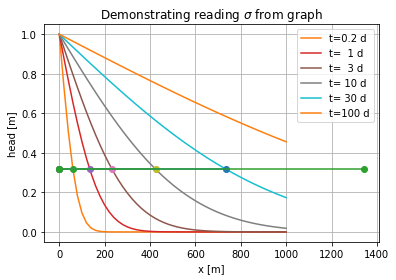

In [21]:
kD = 900; S=0.1; a= 1.0
x = np.linspace(0, 1000, 51)
time = [0.2, 1, 3, 10, 30 , 100]
ax = aplot([], [], xlabel='x [m]', ylabel='head [m]', title='Demonstrating reading $\sigma$ from graph')
uu = x * np.sqrt(S / (4 * kD))
for t in time:
    sigma = np.sqrt(2 * kD * t / S)
    ax.plot(x, a * scp.erfc(uu/np.sqrt(t)), label='t={:3g} d'.format(t))
    ax.plot([0, sigma], [0.317*a, 0.317*a], 'o-') # show location [sigma, 0.317a]
ax.legend()
plt.show()

Seeing a graph like this, just measure $x$ at elevation 0.317a to get $\sigma$ and from that you know $\sqrt{ \frac {2 kD t} S}$ and, therefore, also $\frac {kD} S$, the so-called diffusivity.

Of course this number 0.317 or about 32% becomes 16% in the case where the solution is the full cimulative probability density curve, i.e. $\frac 1 2 a \, \mathrm{erfc}(\cdots)$ instead of $a \, \mathrm{erfc}(\cdots)$.

The relation with the normal probability density function can also be seen as follows. We know that the total probability between $-\sigma<x<\sigma$ is 68%. Hence, the probability that $x<-sigma$ is 16% and so is the probability that $x>+\sigma$. Hence the 16% that we found.

### Examples

1. How far does a sudden change of head penetrate into an aquifer with given $kD$ and $S$ after time $t$?
    Hint express your answer just in terms of $\sigma$

2. Show it for $kD= 900$ m2/d and $S = 0.2$ and times $t$ = [1, 5, 10, 30] days.
    Also show $\sigma$.

3. Assume that from t=0 the head in the river changes from always having been zero. Let is be 
$h$ = [3, -1, 2, 5, 0, -4, 2] m on successive days. Use the same aquifer values as in the previous question.
Show the head as a function of time at $x = 0$ and $x=250$ m.
    Also show the head as a function of $x$ at $t=7$ and 10 d.

3. For the previous situation show the discharge at $x=0$ and $x=250$ m as a function of time.

4. Assume again the same aquifer for which the head suddenly goes up at $t=0$ by 5 m. Compute the infiltration at $x=0$ as a function of time. Also compute the total amount of water that infiltrates during the first year.






### Aquifers of limited extent

Aquifers of limited extent have a boundery at two sides. We deal with boundaries that are eiher of prescribed head or closed. When the the aqufier is of limited exent. then we have a strip of land. It means that the head change provoked by the boundary on one side affects after some time that on the other side. To compensate that we have to add another strip of land with the same of opposite head change whose effect will keep the head at the opposite boundary fixed or closed. But that new superimposed strip also affects the head at the first boundary, which in turn demands a strip of land with a boundary to compensate it. And so on. The picture below illustrates this for the case where the head at the left size of the limited aquier is suddenly changed, while that at the right side is kept fixed at zero. How to view this as a superposition of the combined impact for many adjacent strips of land is illustrated in the lower pictures, which is a zoom-out of the strip of width L and its adjacent strips that serve the superposition. The arrows indicate the head change that is applied.

Firstly we have a positive head change at A. But to keep the head at B unchanged, we need the downward head change (downward arrow) at distance L to te right of B. To compensate its effect at A, we need an upward head change at distacne x = -3L, to the left of A. This in turn requires a downward head change at x=5L to the right, then an upward at x=7L to the left and so on until infinity. So our superposition is an endless series. Of coures, we only need to take enough of its terms into consideration to guarantee convergence, the more time, the more terms will be necessary.

![Superposition](./pictures/StripSuperpositionLeft.png)

By taking the distant view of the lower picture, one can immediately see that this series leads to the correct situation for the strip under consideration. Observing that from point B there are each downward arrow is exactly compensated by an upward arrow at the same distance. There total effect at B is, therefore, zero. Hence the head at B will remain zero forever. The same is true when we observe the arrows to the right and the left of A. All these arrows also add up to zero at A. So the only effect left is the arrow at A itself. This one yields the desired head change at A.

To write this out in a single formula, we separate the postive arrows to the left from the negative ones to the right.
To do this we first choose a convenient x-axis. In this case z=0 at B. You can make another choice if you like. To relative to B (x=0) all left arrows are at $(2i-1) L$ with $i$ going from 1 to $\infty$. The distance from arrow $i$ to a point at $x=x$ then becomes $(2i-1) L + x $. For the downward arrows to the right of B, the distance to a point at $x=x$ is $(2i-1)L - x$. Our basic solution that reads

$$ s = a \, \mathrm{erfc}\left( x \sqrt{ \frac S  {4 kD t} }\right) $$

thus transformed into the infinite series becomes:

$$ s(x, t) = a \sum_{i=1}^{\infty} \left[ \mathrm{erfc} \left( \left( (2 i - 1) L + x  \right) \sqrt{ \frac S {4 kD t}} \right)  - \mathrm{erfc} \left(\left((2 i - L) - x \right) \sqrt{ \frac S {4 kD t}}  \right) \right] $$



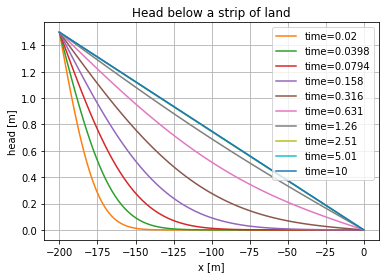

In [22]:
kD = 900.  # m2/d
S = 0.1
a = 1.5 # m
L = 200 # m
x = np.linspace(-L, 0, 100)
time = np.logspace(-2, 1, 11)
ax = aplot([], [], xlabel='x [m]', ylabel='head [m]', title='Head below a strip of land')
for t in time[1:]:
    s = np.zeros(x.shape)
    for i in range(1, 20): # i runs form i to inf, not from zero to inf, range(1, ...)
        s +=  a * (scp.erfc(((2 * i - 1) * L + x) * np.sqrt(S / (4 * kD * t))) -
                   scp.erfc(((2 * i - 1) * L - x) * np.sqrt(S / (4 * kD * t))))
    ax.plot(x, s, label='time={:.3g}'.format(t))
ax.legend()
plt.show()

To show that it's your choice of the point where $x=0$, the example below has x=0 at the center of the strip. In that case we have the upward arrows at $(2i + 0.5)L$ for $i \ge 0$ and the downward arrows at  $(2i -0.5) L$ for $i>0$. This series is not in balance, but it works just the same:

$$s(x, t) = a\,\sum_{i=0}^\infty\mathrm{erfc}\left(((2i + 0.5) L + x)\sqrt{\frac S {4 kD t} }\right) - 
 a\,\sum_{i=1}^\infty \mathrm{erfc}\left(((2 i - 0.5) L + x)\sqrt{\frac S {4 kD t } }\right)$$
 
 Notice that the first series starts at $i=0$ and the second at $i=1$ !

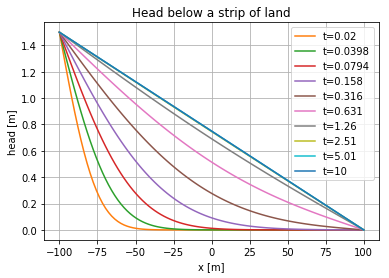

In [23]:
x = np.linspace(-L/2, +L/2, 100)
time = np.logspace(-2, 1, 11)
ax = aplot([], [], xlabel='x [m]', ylabel='head [m]', title='Head below a strip of land')
for t in time[1:]:
    s = np.zeros(x.shape)
    for i in range(200):
        s +=  a * scp.erfc(((2 * i + 0.5) * L + x) * np.sqrt(S / (4 * kD * t))) 
        if i>0:
            s -= a * scp.erfc(((2 * i - 0.5) * L - x) * np.sqrt(S / (4 * kD * t)))
    ax.plot(x, s, label='t={:.3g}'.format(t))
ax.legend()
plt.show()

We get the same  result, as expected. Just the x-axis has been shifted. The center of the strip is now at $x=0$ instead at $x=-100$ as it was before.

Next example is one in which the head is changed both to the left and the right of the strip but independently. The head change at the left is $a$ and that at the right is $b$.

How to tackle this (most complicated) case which is shown graphically here?

![Strip with different head change left and right](./pictures/StripSuperpositionLeftRight.png)

In fact, we can write the solution of as the sum of the previous where left is changed by $a$ and the right boundary is kept at zero plus the case where the right boundary at B is changed by $b$ and the left boundary at A is kept at zero.

This yields the superposition of four series. Again notice the different start of the series $i=0$ versus $i=1$.

$$s(x, t)=a\sum_{i=0}^\infty\mathrm{erfc}\left( ((2 i + 0.5) L + x)\sqrt{\frac S {4 kD t}}\right)  -a\sum_{i=1}^\infty \mathrm{erfc} \left(((2 i - 0.5) L - x)\sqrt{ \frac S {4 kD t}}\right)+$$
  
$$b\sum_{i=0}^\infty\mathrm{erfc}\left(((2 i + 0.5 ) L - x)\sqrt{\frac S {4 kD t }}\right)-b\sum_{i=1}^\infty \mathrm{erfc}\left(((2 i - 0.5 ) L + x)\sqrt{\frac S {4 kD t}}\right)$$


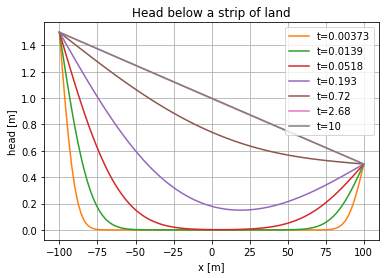

In [24]:
x = np.linspace(-L/2, +L/2, 100)
time = np.logspace(-3, 1, 8)
a = 1.5
b = 0.5
ax = aplot([], [], xlabel='x [m]', ylabel='head [m]', title='Head below a strip of land')
for t in time[1:]:
    s = np.zeros(x.shape)
    for i in range(0,20):
        s += a * scp.erfc(((2 * i + 0.5) * L + x) * np.sqrt(S / (4 * kD * t)))
        s += b * scp.erfc(((2 * i + 0.5) * L - x ) * np.sqrt(S / (4 * kD * t)))
        if i>0:
            s -=  a * scp.erfc(((2 * i - 0.5) * L - x) * np.sqrt(S / (4 * kD * t)))
            s -= b  * scp.erfc(((2 * i - 0.5) * L + x) * np.sqrt(S / (4 * kD * t)))
    ax.plot(x, s, label='t={:.3g}'.format(t))
ax.legend()
plt.show()

The figure shows that the head at the left is indeed fixed at $a=1.5$ m and that at the right at $b=0.5$ m.

The previous example could be used to simulate the changes in the groundater head and flow due to an arbitrary variation of the left boundary water level and independently an arbitrary water level variation at the right boundary of the strip of land.

When $a=b$, the four series of the previous example reduce to two. One sees that in that the $a$ and $b$ arrows are now of equal size and that they alternate (positive, negative, positivie, negative and so on).

The left series then may be written as

$$ s_L(x,t) = a \, \sum_{i=0}^\infty (-1)^i \mathrm{erfc} \left( (i  + 0.5) L + x ) \sqrt{ \frac S {4 kD t}} \right)$$

and the right series as

$$ s_R(x,t) = a \, \sum_{i=0}^\infty (-1)^i \mathrm{erfc} \left( (i  + 0.5) L - x ) \sqrt{ \frac S {4 kD t}} \right)$$

The factor $(-1)^i $ alternates between +1 and -1, as the arrows alternate between positive and negative of $a$.

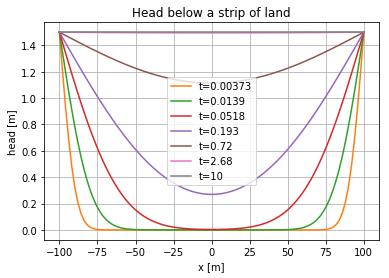

In [25]:
x = np.linspace(-L/2, +L/2, 100)
time = np.logspace(-3, 1, 8)
a = 1.5
b = 0.5
ax = aplot([], [], xlabel='x [m]', ylabel='head [m]', title='Head below a strip of land')
for t in time[1:]:
    s = np.zeros(x.shape)
    for i in range(0,20):
        s += a * (-1)**i * scp.erfc(((i + 0.5) * L + x) * np.sqrt(S / (4 * kD * t)))
        s += a * (-1)**i * scp.erfc(((i + 0.5) * L - x) * np.sqrt(S / (4 * kD * t)))
    ax.plot(x, s, label='t={:.3g}'.format(t))
ax.legend()
plt.show()

Question: How could the previous solution be used to simulate the groundwater after a sudden rain shower?

Hint: a sudden rain shower with magnitured $P$ instantaneously raises the groundwater level by $P/S$, where $S$ is the specific yield of the aquifer.

### Superposition in time

Consider again the half infinite aquifer facing a surface water with varying water level.
What if the water level in the surfvace water varies over time?

As usual we think of superpostion.

To do so, approximate the continuous varyation of the surface water level by a step curve in which the level is piecewise constant with jumps from one step to the next. Then each such jump can be regarded as a sudden change of the water level starting at the time of the jump. Then we can superimpose the effect of all the jumps to obtain the searched answer.

Here we have a series of day-averaged water levels.



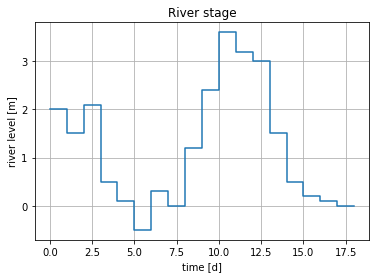

In [26]:
h     = [2, 1.5, 2.1, 0.5, 0.1, -0.5, 0.3, 0, 1.2, 2.4, 3.6, 3.2, 3.0, 1.5, 0.5, 0.2, 0.1, 0]
h     = np.asarray(h)
tjump = np.arange(len(h)+1)  # [0, 1, 2, ... N]

# compute values to plot step graph
tt = np.vstack((tjump[:-1], tjump[1:])).T.ravel()
hh = np.vstack((h, h)).T.ravel()

# plot step graph
ax = aplot(tt, hh, xlabel='time [d]', ylabel='river level [m]', title='River stage')
plt.show()


The jumps at the steps are now regared as sudden changes $\Delta a_i = a_i - a_{i-1}$ that last forever from the time that the jump takes place.

$$ s(x, t)  = \sum_{i=0}^N \Delta a_i \, \mathrm{erfc} \left( x  \sqrt{ \frac S {4 kD (t - t_i) } } \right), \,\,\,\,t\ge t_i $$

To show this

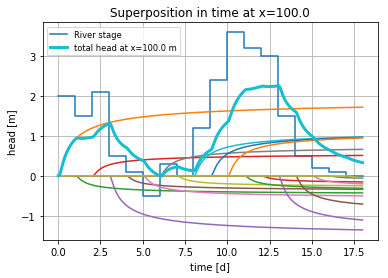

In [27]:
kD = 900.
S = 0.1
Da = np.hstack((h[0], np.diff(h)))  # h[0] is the first step, it's prepended to the diff(h)
x = 100.
ax = aplot(tt, hh, xlabel='time [d]', ylabel='head [m]', title='Superposition in time at x={}'.format(x), label='River stage')
t = np.linspace(tjump[0], tjump[-1], 500)
s = np.zeros(t.shape)
for i, da in enumerate(Da):
    ds = np.hstack((np.zeros(t[t<=tjump[i]].shape), da * scp.erfc(x * np.sqrt(S/ (4 * kD * (t[t>tjump[i]]-tjump[i]))))))
    ax.plot(t, ds)
    s += ds
ax.plot(t, s, lw=3, label='total head at x={} m'.format(x))
ax.legend(loc='best', fontsize='small')
plt.show()


The graph shows the input signal, the step-curve of the river level, the individual curves, one for each jump, and the sum of the individual contributions, all for $x=100$ m.

We may fill in any value for x in the code above. It is illustrative to play with values of $x$ to see its effect.

Notice that we have taken for t many more values than for tjump to obtain smooth curves also between steps.

There exists a more effective way to compute the effect of a continuous input, namely by convolution. However convolution is beyond this short course.

Olsthoorn (2008) Do a bit more with convolution. Grounwater Journal. 

### Questions

1. Consider an aquifer (kD=400 m2/d, S=0.1) in good contact with a river. The water level in the river changes 3 m in a very short time. Show the effect of this change for a point at x=10, x=100 and x=1000 m.

1. How long does it take till the head change in each of the three points is 10 cm?

1. Show the head over time in these points.

1. Show the discharge over time at these points.

1. The Egytian Nasser lake started being filled in 1970. By 1995 the water level in the lake had risen by 100 m. Assume that the aquifer adjacent to the lake as a fixed transmissivity of kD=200 m2/d, and a storage coefficient S=0.1. What then is the expected head rise at 1, 5, 10 and 25 km in 1995?

1. How much water will have infiltrated per m shore length over 25 years?

1. What will it be in 2095, assuming that the water level is kept fixed suddenly at +100 m at 1995?

1. How long will it take until the head in the center of a 10 m thick aquitard with a total resistance of $c=5000$ d and a specific storage coefficient of $S_s=10\times 10^{-5} $/m has reached half the head change that was suddenly applied on both the top and the bottom of the aquitard?

A canal in a dune area is used to provide water storage for drinking water in the case of an emergency. The adjacent aquifer has kD=100 m2/d and S=0.2. During an emergency, the water level in the canal is suddenly lowered by 5 m at a rate of 1 m/d . Answer the following questions:

1. How much water will flow into this canal from the aquifer in 1 day, 1 week and in 6 weeks?

2. What will be the drawdown over time at 10, 100, 300 and 1000 m from the canal?

3. We neglected the volume of the canal itself. What percentage of the water actually comes from the canal  itself, assuming it is 40 m wide?

4. Show the discharge from the aquifer into the  canal if there were another canal at 70 m distance, in which the same sudden water level lowering was applied.

## Characteristic reaction time groundwater systems

### A strip of land as a general model for groundwater systems

There exists a close analytical solution for the for the decay over time for a strip of land with groundwater head initially horizontal at a distance above two parallel water courses the the same water level. We can use this solution as a model to derive the reaction time of geneal groundwater systems, which can practially always by (coarsely) schematized to such a setup.

Above, we solved the case in which the head changes on both sides of the strip was the same at both boundaries by superposition of two infinite series each valid for an half-infinite aquifer. While this is perfectly o.k., another solutions exists. These two approaches may look mathematically completely different, yet they yield exactly the same answer. A third solution, can be fond by simulating the sudden change of head by means of superposition of a infinite number of sines or cosines. Here we'll explore another analytical solution, one that describes the head change in the bounded strip for the case that the groundater level is initially uniform but different from the fixed level of the bounding channels. Hence, $s(x,0)=a$, at $t=0$, afer which the groundwater starts flowing to the fixed-head boundaries that are kept at $s(-\frac L 2,t)=0$ and $s(+ \frac L 2, t) = 0$. This draining has some characteristics to explore. 

The strip of of land is taken as a simplified model for general groundwater systems of arbitrary width that dynamically drain to their boundaries.

The solution is known as by Kraaijenhof van der Leur (see Verruijt, 1999), but is also given in Carlaw and Jaeger (1959, p97, eq 8):

$$s(x,t) = a \, \frac 4 \pi \sum_{j=1}^\infty \left[ \frac {(-1)^{j-1}} {2j-1} \cos \left( (2j-1) \pi \frac x L \right) \,\exp \left( - (2j - 1)^2 \pi^2 \frac {kD} {L^2 S} t \right) \right]$$

Let's first show the solution at work:

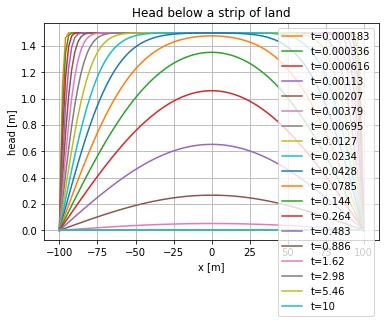

In [28]:
x = np.linspace(-L/2, +L/2, 100)
time = np.logspace(-4, 1, 20)
a = 1.5
ax = aplot([], [], xlabel='x [m]', ylabel='head [m]', title='Head below a strip of land')
for t in time[1:]:
    s = np.zeros(x.shape)
    for j in range(1, 50):
        f1 = (-1)**(j-1)/(2 * j -1)
        f2 = np.cos((2 * j -1) * np.pi * x / L)
        f3 = np.exp(-(2 * j -1)**2 * np.pi**2 * kD/(L**2 * S ) * t)
        s += a * 4 / np.pi * (f1 * f2 * f3) 
    ax.plot(x, s, label='t={:.3g}'.format(t))
ax.legend()
plt.show()

Indeed, the initial head is $s(x,0)=a$ and with time increasing, it declines toward $s(x,\infty) = 0$.

The graphs show nicely what happens: Initially there is a fast drainage towards the boundaries, one which only affects the head nearby them. Gradually the impact of the drainage creeps to the center of the strip. When reached, the entire water table is smoothly curved and declines gradually towards its equilibrium at $s(x,\infty)=0$.

Question: What is the relation between this solution and the one in the previous section, where the head was initially uniform and at the level of the ditches, while the level of the ditches suddenly changes at $t=0$ by a fixed amount?

This question relates to the question below the previous example.
Join the two solutions and show that they are exactly the same.
Hint plot one with continuous lines and the other as a series of 'x' markers to show both curves when they exactly overlap.


### Exploring the solution of Kraaijenhof van der Leur / Carlaw and Jaeger

The last analytical solution can be easily explored to uncover its behavior. From it, we can conclude about the reaction time of general groundwater systems.

The argument behind the $\sum$ consists of the three factors that were used in the code above:

$$ f_1 = \frac {(-1)^{j-1}} {2j - 1} $$
$$ f_2 = \cos \left( (2j -1) \pi \frac x L \right) $$
$$ f_3 = \exp \left( -(2j - 1)^2 \pi^2 \frac {kD} {L^2 S} \right) $$



$f_1$ just alternates between -1 and +1

$f_2$ is only dependent on space (on $x$) not on time.

$f_3$ only depends on time, not on $x$

$f_2$ is a series of cosines, the first one $(j=1)$ is an arc between $-L/2<x<L/2$, the argument of the cosine being between $-\pi/2$ and $+\pi/2$. The second consists two arcs, because the argument of the cosine is between $-\frac 3 2 \pi$ and $+ \frac 3 2 \pi$ and so on. The figure below shows the $f_2$ for the first 4 terms of the series:

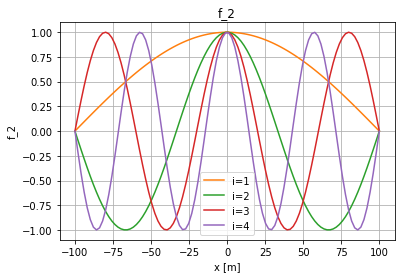

In [29]:
L = 200.
x = np.linspace(-L/2, +L/2, 100)
ax = aplot([], [], xlabel='x [m]', ylabel='f_2', title='f_2')
for j in range(1, 5):
    f2 = np.cos((2 * j -1) * np.pi * x / L)
    ax.plot(x, f2, label='i={}'.format(j))
ax.legend()
plt.show()

If we let $j\rightarrow \infty$, then their sum becomes 1.

However there is the factor $f_3$. This is a negative exponent. That is its argument is always negative because $(2j-1)^2 \pi^2 \frac {kD} {L^2 S} $ is always positive.

By way of example, taking kD=900 m2/d and S=0.1 and some short time $t=0.1$ d

In [30]:
t = 0.25
for j in range(1, 5):
    arg = (2 * j -1)**2 * np.pi**2 * kD / (L**2 * S) * t
    print("j={}  arg={:7.5g}  f_3=exp(-arg)={:11.5g}".format(j, arg, np.exp(- arg)))

j=1  arg=0.55517  f_3=exp(-arg)=    0.57398
j=2  arg= 4.9965  f_3=exp(-arg)=  0.0067617
j=3  arg= 13.879  f_3=exp(-arg)= 9.3836e-07
j=4  arg= 27.203  f_3=exp(-arg)= 1.5341e-12


One sees how fast the exponent declines. Even the second term is negligible to the first. The means that the consines for larger values of j will deminish due to the fast shrinking of the exponent. Therefore, their sum is not adding up to 1 for any $t>0$. Only when time is very small will part of the cosines add up to 1 for points further from the fixed boundaries as is was illustrated in the figure. Already after a relatively short time only the first term matters. When that is the case, we have only one consine,the first, a single arc that is multiplied by an exponent that declines with increasing time. The entire solution then reduces to a single declining cosine arc. So for $t$ large enough:

$$ s(x,t) \approx a \, \frac 4 \pi  \cos \left(  \pi \frac x L \right) \,\exp \left( -  \pi^2 \frac {kD} {L^2 S} t \right)  $$


But what does it mean, $t$ is large enough?

Mathematically we can state this, by requiring that the second term of the exponent is negligible relative to the first. What is negligible may be set by the user, for instance 1% in practical cases. So: with $(2j-1)^2 = 1$ for $j=1$ and $(2j-1)^2= 9$ for $j-2$, stating that the exponent in the first term be much larger than the exponent in the second term, becomes:

$$ \exp \left(- \pi^2 \frac {kD} {L^2 S} t \right) >> \exp \left(-9 \pi^2 \frac {kD} {L^2 S} \right) $$

or 

$$ \exp \left( 8 \pi^2 \frac {kD} {L^2 S} t \right) >> 1 $$


or, practically, whith the choice of 1%, the $>>1$ becomes $> 100$.

$$ \exp \left( 8 \pi^2 \frac {kD} {L^2 S} t \right) > 100 $$

$$  8 \pi^2 \frac {kD} {L^2 S} t  > \ln(100) $$

Now realize that the factor $\frac {L^2 S} {kD}$ has dimention time. We could call this time a characteristic of the system. But before doing that, realize that the essential width of the system is not $L$ but $L/2$, the distance from the boundary to the water divide in the strip center. So let's take $\frac {kD} {\left( \frac L 2 \right) S} as the characteristic time, so

$$ T = \frac  {L^2 S} {4 kD} $$

notice that this factor appears in all transient analytical solutions.

Then

$$  \frac t T  > \frac {\ln(100)} {2 \pi^2} = 0.23$$

$$ t > 0.23 T $$

with $T = \frac {L^2 S} {4 kD} $ the characteristic time of the groundwater system.

So when $t>0.23 T$ we an ignore all the higher terms in the complex analytical solution above and describe the head in the strip as an exponentially declining cosine arc.

We know that exponential decline has a so-called half-time. That is the time in which the head is declined to half its current value is fixed, it's the half-time and its a function of the aquifer size and aquifier properties alone.

So what is the half time? Mathematically, using only the first term, we say that the exponent at time $t=t+T_{50}$ is half its value at $t=t$:

$$ \exp \left(- \frac  {\pi^2} 4 \frac {t + T_{50}} T \right) = 0.5 \exp \left(-\frac  {\pi^2} 4 \frac t T \right) $$

and so:

$$ \exp \left(-\frac {\pi^2} 4 \frac {t + T_{50}} T + \pi^2 \frac t T\right) = 0.5 $$

$$ \exp \left(- \frac {\pi^2} 4 \frac {T_{50}} T\right) = 0.5 $$

$$ \exp \left(\frac {\pi^2} 4 \frac {T_{50}} T\right) = 2 $$

$$ \frac {T_{50}} T = \frac 4 {\pi^2} \ln 2 \approx 0.28 $$

$$ T_{50} \approx 0.28\,T $$


Hence, the half-time of the groundwater system is $0.28 T$ with $T=\frac {L^2 S} { 4 kD} $.

Let us show this by computing the head for multiple half-times:

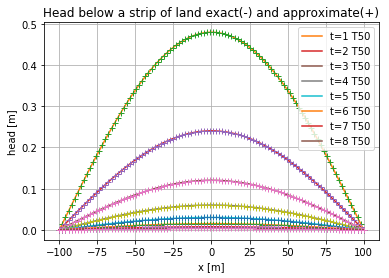

In [31]:
kD = 900 # m2/d
S = 0.1
L = 200 # m
T = L**2 * S /(4 * kD)
T50 = 0.28 * T

x = np.linspace(-L/2, +L/2, 100)
time = np.arange(1, 10) * T50
a = 1.5
ax = aplot([], [], xlabel='x [m]', ylabel='head [m]', title='Head below a strip of land exact(-) and approximate(+)')
for i, t in enumerate(time):
    if i==0: continue
    s = np.zeros(x.shape)
    for j in range(1, 50):
        f1 = (-1)**(j-1)/(2 * j -1)
        f2 = np.cos((2 * j -1) * np.pi * x / L)
        f3 = np.exp(-(2 * j -1)**2 * np.pi**2 * kD/(L**2 * S ) * t)
        s += a * 4 / np.pi * (f1 * f2 * f3) # exact
    ax.plot(x, s, label='t={} T50'.format(i))
    ax.plot(x, a * 4 / np.pi * np.cos(np.pi * x/L) * np.exp(- np.pi**2/4 * t/T) , '+') # approximate
ax.legend()
plt.show()

The curves show that indeed the exact curve and the approximation are practically equal for $t>0.23T$. One can also see that the each subsequent graph is half as high as its predecessor. For smaller values of time this is not so, as you can readily verify yourself.

### Values for the characteristic time of some groundwater systems

In [20]:
grwSys = [{ 'aquifer':'Nubian Sandstone', 'country':'Egypt',      'kD':500,  'S':0.001, 'L':1e6},
            {'aquifer':'Kalahari Desert', 'country':'Botswana',   'kD':500,  'S':0.1,   'L':6e5},
            {'aquifer':'Veluwe area',     'country':'Netherlands','kD':6000, 'S':0.27,  'L':40000},
            {'aquifer':'Dunes',           'country':'Netherlands','kD':200,  'S':0.22,  'L':4000},
            {'aquifer':'Flower bulbfield','country':'Netherlands','kD':200,  'S':0.1,   'L':100}]

print(('{:20s} {:12s}' + 5 *' {:>10s}').format('aquifer', 'country', 'kD', 'S', 'L','T50%[yr]','T50%[d]'))

dpy = 365.24
for s in grwSys:
    s['T']=s['L']**2 * s['S'] /(4 * s['kD'])
    s['T50'] = 0.28 * s['T']
    print('{:20s} {:12s} {:10.3g} {:10.3g} {:10.3g} {:10.3g} {:10.3g}'.\
          format( s['aquifer'], s['country'], s['kD'], s['S'], s['L'], s['T50']/dpy, s['T50']) )

aquifer              country              kD          S          L   T50%[yr]    T50%[d]
Nubian Sandstone     Egypt               500      0.001      1e+06        383    1.4e+05
Kalahari Desert      Botswana            500        0.1      6e+05   1.38e+04   5.04e+06
Veluwe area          Netherlands       6e+03       0.27      4e+04       13.8   5.04e+03
Dunes                Netherlands         200       0.22      4e+03       3.37   1.23e+03
Flower bulbfield     Netherlands         200        0.1        100   0.000958       0.35


The situation in the Kalahari desert was investigated by J.J. de Vries (1984). He showed that the head in the desert is still declining after the wet episode in the last ice age. Its half-time is about 1200u years. As a consequence, large aquifer systems are never in equilibrium because climate changes faster than they can reach their equilibrium.

![Long term Kalahari head decline](./pictures/KalahariDeVries1984.png)

### In conclusion

The analysis made above, gives you a direct clue as to the reaction time of groundwater systems of any size, where by size we mean the distance between fixed head boundaries. The half-time of these systems is simply

$$ T_{50} \approx 0.28 \frac {L^2 S} {4 kD} $$

## Questions

1. By what steps did we come to the characteristic time of groundwater systems?
1. Derive for yourself the half-time of a groundwater system.
1. Think of one or two important aquifers in your country and estimate their characteristic times.
1. What is the consequence of using a steady-state solution or numerical model in an exendesert?